In [1]:
#Real one

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
class ANN:
    def __init__(self,epochs,lr,b1,b2):
        self.epochs=epochs
        self.lr=lr
        self.weight_collector={}
        self.loss_history=[]
        self.smoothing=1e-15
        self.alpha=1e-5
        self.w1=[]
        self.w2=[]
        self.w3=[]
        self.best_weights=[None,None,None]
        self.b1=b1 # some constant value
        self.b2=b2
        self.loss_thresold=float("inf")

    def fit(self,X_train,y_train):
        itr_numb=X_train.shape[0]
        #initializing weights using he normal 
        self.w1=np.random.randn(3)*np.sqrt(2/1)
        print(self.w1)
        #Node 2 initialization
        self.w2=np.random.randn(3)*np.sqrt(2/3)
        print(self.w2)

        #Node 3 initialization 
        self.w3=np.random.randn(2)*np.sqrt(2/2)
        print(self.w3)


        
        # Weight adjustments
        for k in range(0,self.epochs):
            loss_sum=0
            for i in range(0,itr_numb):
                #Node 1
                # multiplying weights with input 
                x_vec = X_train[i]
                node1_out = np.dot(x_vec,self.w1)+self.b1
                if node1_out<0:
                  node1_out = self.alpha*(node1_out)
                else:
                  node1_out = max(0,node1_out) # relu

                #Node 2
                x_vec = X_train[i]
                node2_out = np.dot(x_vec,self.w2)+self.b1
                if node2_out<0:
                  node2_out = self.alpha*(node2_out)
                else:
                  node2_out = max(0,node2_out) # relu

                #Node 3

                #Output layer

                out_layer = [node1_out,node2_out]

                # multiplying weights with input 
                x_vec = X_train[i]
                out_node = np.dot(out_layer,self.w3)+self.b2
                y_out=(1/(1+np.exp(-out_node)))

                #Loss/Cost function and weight updation

                # for node 1
                slope1 = -(((y_train.iloc[i]/(y_out+self.smoothing))*(1/pow((1+np.exp(-out_node)),2))*np.exp(-out_node)*(self.w3[0]*X_train[i][0]))-
                                          ((1-y_train.iloc[i])/(1-y_out+self.smoothing))*(1/pow((1+np.exp(out_node)),2))*np.exp(out_node)*
                           (self.w3[0]*X_train[i][0]))
                self.w1[0] = self.w1[0]-(self.lr*slope1)

                slope2 = -(((y_train.iloc[i]/(y_out+self.smoothing))*(1/pow((1+np.exp(-out_node)),2))*np.exp(-out_node)*(self.w3[0]*X_train[i][1]))-
                                          ((1-y_train.iloc[i])/(1-y_out+self.smoothing))*(1/pow((1+np.exp(out_node)),2))*np.exp(out_node)*(self.w3[0]*X_train[i][1]))
                self.w1[1] = self.w1[1]-(self.lr*slope2)

                slope3 = -(((y_train.iloc[i]/(y_out+self.smoothing))*(1/pow((1+np.exp(-out_node)),2))*np.exp(-out_node)*(self.w3[0]*X_train[i][2]))-
                                          ((1-y_train.iloc[i])/(1-y_out+self.smoothing))*(1/pow((1+np.exp(out_node)),2))*np.exp(out_node)*(self.w3[0]*X_train[i][2]))
                self.w1[1] = self.w1[1]-(self.lr*slope3)

                # for node 2
                slope4 = -(((y_train.iloc[i]/(y_out+self.smoothing))*(1/pow((1+np.exp(-out_node)),2))*np.exp(-out_node)*(self.w3[1]*X_train[i][0]))-
                                          ((1-y_train.iloc[i])/(1-y_out+self.smoothing))*(1/pow((1+np.exp(out_node)),2))*np.exp(out_node)*(self.w3[1]*X_train[i][0]))
                self.w2[0] = self.w2[0]-(self.lr*slope4)

                slope5 = -(((y_train.iloc[i]/(y_out+self.smoothing))*(1/pow((1+np.exp(-out_node)),2))*np.exp(-out_node)*(self.w3[1]*X_train[i][1]))-
                                          ((1-y_train.iloc[i])/(1-y_out+self.smoothing))*(1/pow((1+np.exp(out_node)),2))*np.exp(out_node)*(self.w3[1]*X_train[i][1]))
                self.w2[1] = self.w2[1]-(self.lr*slope5)

                slope6 = -(((y_train.iloc[i]/(y_out+self.smoothing))*(1/pow((1+np.exp(-out_node)),2))*np.exp(-out_node)*(self.w3[1]*X_train[i][2]))-
                                          ((1-y_train.iloc[i])/(1-y_out+self.smoothing))*(1/pow((1+np.exp(out_node)),2))*np.exp(out_node)*(self.w3[1]*X_train[i][2]))
                self.w2[1] = self.w2[1]-(self.lr*slope6)

                #for output node 

                slope7 = -(((y_train.iloc[i]/(y_out+self.smoothing))*(1/pow((1+np.exp(-out_node)),2))*np.exp(-out_node)*(node1_out)-
                                          ((1-y_train.iloc[i])/(1-y_out+self.smoothing))*(1/pow((1+np.exp(out_node)),2))*np.exp(out_node)*(node1_out)))
                self.w3[0] = self.w3[0]-(self.lr*slope7)

                slope8 = -(((y_train.iloc[i]/(y_out+self.smoothing))*(1/pow((1+np.exp(-out_node)),2))*np.exp(-out_node)*(node2_out)-
                                          ((1-y_train.iloc[i])/(1-y_out+self.smoothing))*(1/pow((1+np.exp(out_node)),2))*np.exp(out_node)*(node2_out))) 
                self.w3[1] = self.w3[1]-(self.lr*slope8)

                #Updating the biases
                slope_bias1 = -(((y_train.iloc[i]/(y_out+self.smoothing))*
                                 (1/pow((1+np.exp(-out_node)),2))*np.exp(-out_node)*(self.w3[0]+self.w3[1])-
                                          ((1-y_train.iloc[i])/(1-y_out+self.smoothing))*
                                 (1/pow((1+np.exp(out_node)),2))*np.exp(out_node)*(self.w3[0]+self.w3[1]))) 
                self.b1 = self.b1-(self.lr*slope_bias1)
                
                slope_bias2 = -(((y_train.iloc[i]/(y_out+self.smoothing))*
                                 (1/pow((1+np.exp(-out_node)),2))*np.exp(-out_node)*(self.w3[0]*(node1_out)
                                 +self.w3[1]*(node2_out))-((1-y_train.iloc[i])/(1-y_out+self.smoothing))*
                                 (1/pow((1+np.exp(out_node)),2))*np.exp(out_node)*(self.w3[0]*(node1_out)
                                 +self.w3[1]*(node2_out)))) 
                self.b2 = self.b2-(self.lr*slope_bias2)

                ##Kepping the best weights
                loss_sum+=(y_train.iloc[i]*np.log(y_out+self.smoothing))+(
                    (1-y_train.iloc[i])*np.log(1-y_out+self.smoothing))
            
            final_loss = (-loss_sum/itr_numb)
            self.loss_history.append(final_loss)
            #check
            print("************************* epoch ",k," **************************")
            print("##########################################################")
            print("w1",self.w1)
            print("w2",self.w2)
            print("w3",self.w3)
            print("b1",self.b1)
            print("b2",self.b2)
            print(node1_out)
            print(node2_out)
            print(y_out)
            print("current loss is :- ",final_loss)
            if (self.loss_history[k]<self.loss_thresold):
              self.loss_thresold=self.loss_history[k]
              self.best_weights[0]=self.w1
              self.best_weights[1]=self.w2
              self.best_weights[2]=self.w3

    def predict(self,X_test):
      #test data
      itr_numb=X_test.shape[0]
      predictions=[]
      for i in range(0,itr_numb):
        #Node 1
        # multiplying weights with input 
        x_vec = X_test[i]
        node1_out = np.dot(x_vec,self.w1)+self.b1

        #Node 2
        x_vec = X_test[i]
        node2_out = np.dot(x_vec,self.w2)+self.b1

        #Node 3

        #Output layer

        out_layer = [node1_out,node2_out]

        # multiplying weights with input 
        x_vec = X_test[i]
        out_node = np.dot(out_layer,self.w3)+self.b2
        y_out=(1/(1+np.exp(-out_node)))
        predictions.append(y_out)
      return predictions

    def train_loss_plot(self):
        plt.plot(self.loss_history)
        plt.xlabel("Epoch number")
        plt.ylabel("loss")
        plt.show()
    def test_report(self,y_test,predictions):
      conf_matrix = confusion_matrix(y_test,predictions)
      sns.heatmap(data=conf_matrix,annot=True,fmt='d')
      plt.xlabel("Predicted")
      plt.ylabel("Actual")
      print(classification_report(y_test,predictions))

# Data Preparation

In [5]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SUSY/susycomplete.csv")

In [6]:
df.head(3)

,target,lepton 1 pT,lepton 1 eta,lepton 1 phi,lepton 2 pT,lepton 2 eta,lepton 2 phi,missing energy magnitude,missing energy phi,MET_rel,axial MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1)
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910


In [7]:
df.shape

(100000, 19)

In [8]:
df['target'].value_counts()

0.0    54025
1.0    45975
Name: target, dtype: int64

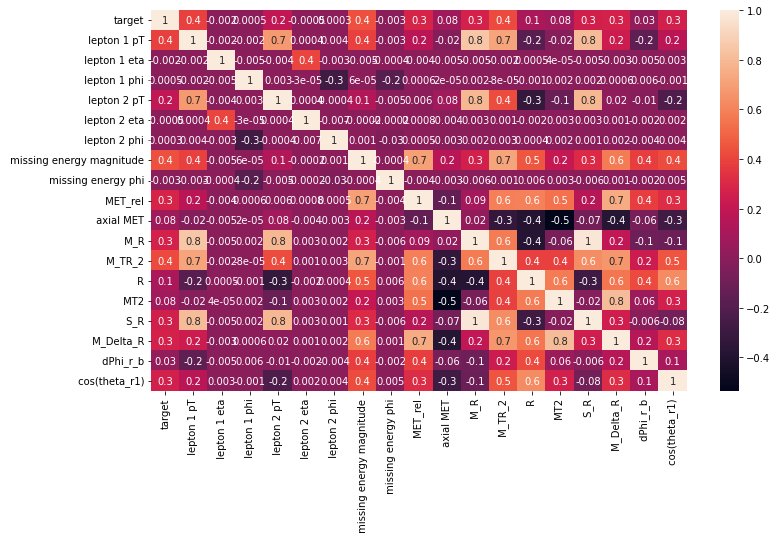

In [9]:
plt.figure(figsize=(12,7))
corr=df.corr()
sns.heatmap(corr,annot=True,fmt='.1g')

In [10]:


X=df[[' lepton 1 pT',' missing energy magnitude',' M_TR_2']]
y=df['target']

In [11]:
X=X[0:30000]
y=y[0:30000]
scaling = MinMaxScaler()
X_scaled=scaling.fit_transform(X)

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.50,random_state=32)

In [13]:
X_train.shape

(15000, 3)

In [14]:
y_train.value_counts()

0.0    8079
1.0    6921
Name: target, dtype: int64

In [15]:
y_test.value_counts()

0.0    8159
1.0    6841
Name: target, dtype: int64

# Testing

In [16]:
#3,5.5 -- best
#3,8.5---- 2nd good
ann_object = ANN(100,0.0001,3,5.5)

In [17]:
ann_object.fit(X_train,y_train)

[-2.39349333 -1.9970122   1.59936409]
[-0.25557174 -0.38151422 -0.58230759]
[-0.79586894 -1.0485422 ]
************************* epoch  0  **************************
##########################################################
w1 [-2.40683815 -2.02190612  1.59936409]
w2 [-0.27252094 -0.41311697 -0.58230759]
w3 [-0.89101169 -1.11434054]
b1 3.030155172045077
b2 5.651688057166057
2.96762718472476
2.9645312121740472
0.42665722272176493
current loss is :-  0.6425381233463295
************************* epoch  1  **************************
##########################################################
w1 [-2.42214096 -2.05101035  1.59936409]
w2 [-0.29131638 -0.44886056 -0.58230759]
w3 [-0.91717919 -1.11014591]
b1 3.0134625781115174
b2 5.670959201907527
2.9489834663220336
2.9454424994100914
0.42478178744226786
current loss is :-  0.6386402558124846
************************* epoch  2  **************************
##########################################################
w1 [-2.43770137 -2.08064966  1.59

In [18]:
# ann_object.loss_history

In [19]:
ann_object.w1

array([-3.50448573, -4.47361455,  1.59936409])

In [20]:
ann_object.loss_thresold

0.5049164865408053

In [21]:
ann_object.best_weights

[array([-3.50448573, -4.47361455,  1.59936409]),
 array([-1.13302224, -2.29820615, -0.58230759]),
 array([-3.54171375, -2.33303922])]

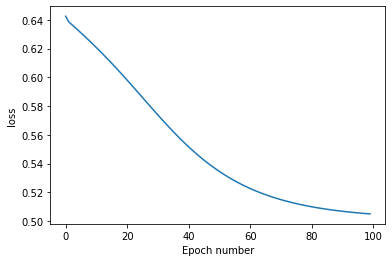

In [22]:
ann_object.train_loss_plot()

In [23]:
ann_object.w2

array([-1.13302224, -2.29820615, -0.58230759])

In [24]:
predictions=[]
predictions_sigmoid = ann_object.predict(X_test)
for i in predictions_sigmoid:
  if i>0.5:
    predictions.append(1)
  else:
    predictions.append(0)

              precision    recall  f1-score   support

         0.0       0.75      0.87      0.80      8159
         1.0       0.81      0.65      0.72      6841

    accuracy                           0.77     15000
   macro avg       0.78      0.76      0.76     15000
weighted avg       0.77      0.77      0.76     15000



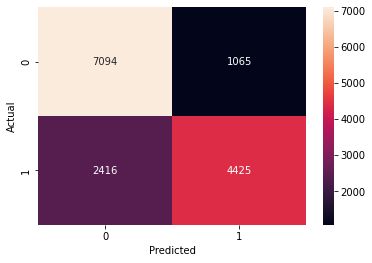

In [25]:
ann_object.test_report(y_test,predictions)
# [[1551 7046]
#  [ 146 6257]]

In [26]:
pd.Series(predictions).value_counts()

0    9510
1    5490
dtype: int64

In [27]:
data={
    "w1":ann_object.w1,
    "w2":ann_object.w2,
    "w3":ann_object.w3,
    "b1":ann_object.b1,
    "b2":ann_object.b2
}

In [28]:
data

{'b1': 2.6982168917175464,
 'b2': 13.64324702754895,
 'w1': array([-3.50448573, -4.47361455,  1.59936409]),
 'w2': array([-1.13302224, -2.29820615, -0.58230759]),
 'w3': array([-3.54171375, -2.33303922])}

<h1> Bias collector </h1>

In [29]:
#AUC
# from sklearn.metrics import roc_curve
# fpr, tpr, thresholds=roc_curve(y_test,predictions)

In [30]:
# loss3=ann_object.loss_history

In [31]:
# loss1=ann_object.loss_history

In [32]:
# loss2=ann_object.loss_history

In [33]:
# bias_values={}

In [34]:
# bias_values[("b1=1,b2=1")]=loss1

In [35]:
# bias_values[("b1=10,b2=15")]=loss2

In [36]:
# bias_values[("b1=3,b2=4.5")]=loss3

In [37]:
# df_graph= pd.DataFrame(bias_values)

In [38]:
# df_graph['b1=1,b2=1']

In [39]:
# plt.plot(df_graph['b1=1,b2=1'],'p')
# plt.plot(df_graph['b1=3,b2=4.5'],"*")
# plt.plot(df_graph['b1=10,b2=15'],"^",markersize=4)
# plt.legend(['b1=1,b2=1',"b1=3,b2=4.5",'b1=10,b2=15'])
# plt.xlabel("Epoch number")
# plt.ylabel("Loss value")
# plt.show()

<h1> Using keras </h1>

In [40]:
import tensorflow as tf
from tensorflow import keras

In [41]:
model = keras.Sequential()

model.add(keras.layers.Dense(units=2,activation="leaky_relu",input_dim=3))
model.add(keras.layers.Dense(units=1,activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 8         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics="accuracy")

In [43]:
model_history=model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
469/469 [==============================] - 2s 4ms/step - loss: 0.6781 - accuracy: 0.6721 - val_loss: 0.6595 - val_accuracy: 0.7349
Epoch 2/100
469/469 [==============================] - 2s 3ms/step - loss: 0.6357 - accuracy: 0.7453 - val_loss: 0.6126 - val_accuracy: 0.7540
Epoch 3/100
469/469 [==============================] - 2s 3ms/step - loss: 0.5932 - accuracy: 0.7529 - val_loss: 0.5761 - val_accuracy: 0.7591
Epoch 4/100
469/469 [==============================] - 1s 3ms/step - loss: 0.5639 - accuracy: 0.7558 - val_loss: 0.5521 - val_accuracy: 0.7596
Epoch 5/100
469/469 [==============================] - 2s 3ms/step - loss: 0.5456 - accuracy: 0.7575 - val_loss: 0.5377 - val_accuracy: 0.7605
Epoch 6/100
469/469 [==============================] - 1s 3ms/step - loss: 0.5347 - accuracy: 0.7568 - val_loss: 0.5278 - val_accuracy: 0.7587
Epoch 7/100
469/469 [==============================] - 1s 3ms/step - loss: 0.5276 - accuracy: 0.7577 - val_loss: 0.5218 - val_accuracy: 0.7609

Text(0.5, 0, 'Epoch number')

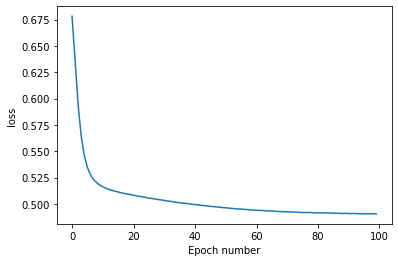

In [44]:
loss=model_history.history['loss']
index=np.arange(100)
sns.lineplot(x=index,y=loss)
plt.ylabel('loss')
plt.xlabel('Epoch number')

In [45]:
predictionsKeras=[]
predictions_sigmoid_keras = model.predict(X_test)
for i in predictions_sigmoid_keras:
  if i>0.5:
    predictionsKeras.append(1)
  else:
    predictionsKeras.append(0)

Text(33.0, 0.5, 'Actual')

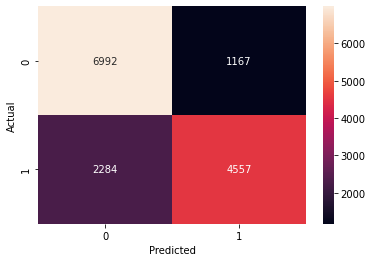

In [46]:
cf=confusion_matrix(y_test,predictionsKeras)
sns.heatmap(data=cf,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [47]:

print(classification_report(y_test,predictionsKeras))

              precision    recall  f1-score   support

         0.0       0.75      0.86      0.80      8159
         1.0       0.80      0.67      0.73      6841

    accuracy                           0.77     15000
   macro avg       0.77      0.76      0.76     15000
weighted avg       0.77      0.77      0.77     15000



<h1>Precision Recall curve</h1>


In [48]:
#predictions_sigmoid
def PR_cal(custom_thresolds,y_test,predictions_sigmoid):
  precisionData = []
  recallData = []
  for i in custom_thresolds:
    predictions=[]
    for values in predictions_sigmoid:
      if values>i:
        predictions.append(1)
      else:
        predictions.append(0)
    tn, fp, fn, tp=confusion_matrix(y_test,predictions).ravel()
    precision=tp/(tp+fp)
    recall = tp/(tp+fn)
    precisionData.append(precision)
    recallData.append(recall)
  return precisionData,recallData

In [49]:
custom_thresolds=np.linspace(0,0.98,200)

In [50]:
precisionData,recallData=PR_cal(custom_thresolds,y_test,predictions_sigmoid)

In [51]:
precisionDataKeras,recallDataKeras=PR_cal(custom_thresolds,y_test,predictions_sigmoid_keras)

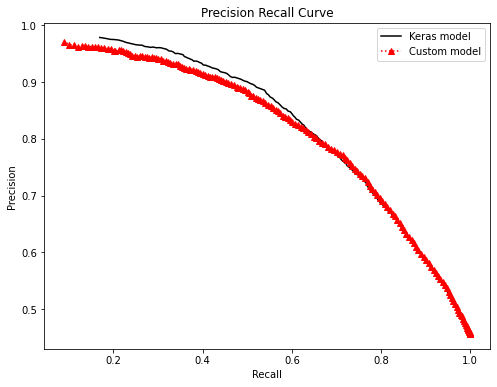

In [52]:
plt.figure(figsize=(8,6))
plt.plot(recallDataKeras,precisionDataKeras,"-k")
plt.plot(recallData,precisionData,"^r:")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(['Keras model',"Custom model"])
plt.title("Precision Recall Curve")

plt.show()

In [53]:
model.save_weights("kerasModelSusy.h5")

<h1> ROC </h1>

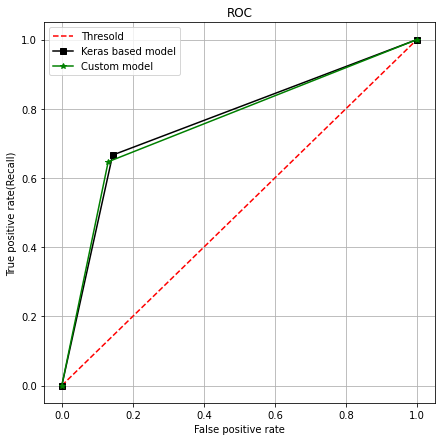

In [54]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thresholds2=roc_curve(y_test,predictions)
fpr2, tpr2, thresholds1=roc_curve(y_test,predictionsKeras)
plt.figure(figsize=(7,7))
plt.plot([0, 1], [0, 1], '--',color='red',label='Thresold')
plt.plot(fpr2, tpr2,color='black',label='Keras based model',marker="s")
plt.plot(fpr1, tpr1,color='green',label='Custom model',marker="*")
plt.ylabel('True positive rate(Recall)')
plt.xlabel('False positive rate')
plt.title('ROC')
plt.grid()
plt.legend()
plt.show()

<h1> ROC AUC </h1>

In [55]:
rocAucCustom = roc_auc_score(y_test,predictions)
rocAucCustom

0.7581522778556342

In [56]:
rocAucKeras = roc_auc_score(y_test,predictionsKeras)
rocAucKeras

0.7615492241531459

<h1> Loss visualization </h1>

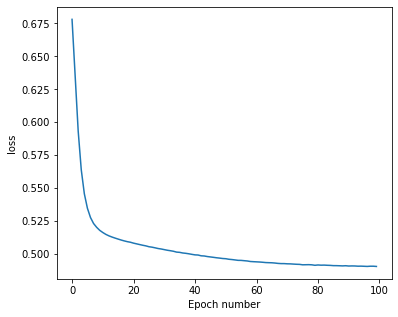

In [57]:
plt.figure(figsize=(6,5))
plt.plot(model_history.history['loss'])
plt.xlabel("Epoch number")
plt.ylabel("loss")
plt.show()

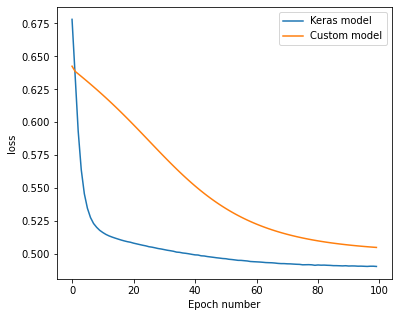

In [58]:
plt.figure(figsize=(6,5))
plt.plot(model_history.history['loss'])
plt.plot(ann_object.loss_history)
plt.xlabel("Epoch number")
plt.ylabel("loss")
plt.legend(['Keras model','Custom model'])
plt.show()

<h1> Bias Tuner </h1>

In [59]:
# class ANNTuner():
#   def __init__(self,model,lower_thresold,upper_thresold):
#     self.model=model
#     self.lower_thresold=lower_thresold
#     self.upper_thresold = upper_thresold
#     self.epochs=100
#     self.learning_rate=0.0001
#     self.finalResult={}
#     self.temp=[]
#   def tune(self,X_train,y_train,X_test,y_true):
#     for i in range(0,len(self.lower_thresold)):
#       modelObj = self.model(self.epochs,self.learning_rate,self.lower_thresold[i],self.upper_thresold[i]) 
#       modelObj.fit(X_train,y_train)
#       predictions=[]
#       predictions_sigmoid = modelObj.predict(X_test)
#       for j in predictions_sigmoid:
#         if j>0.5:
#           predictions.append(1)
#         else:
#           predictions.append(0)
#       print(f"{i}   {predictions_sigmoid}")
#       print(f"{i}   {predictions}")
#       self.temp.append(f1_score(y_true,predictions))
#       self.finalResult[(self.lower_thresold[i],self.upper_thresold[i])]=self.temp[i]
#     return self.finalResult

In [60]:
# ANNTuner_obj = ANNTuner(ANN,[1,1.5,3,5],[1,3.9,4.5,6.5])
# baises_withF1Score = ANNTuner_obj.tune(X_train,y,X_test,y_test)

In [61]:
# print(baises_withF1Score)